In [42]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns

In [2]:
# Load datasets
df1 = pd.read_csv('sensors_category/n_prime_pm_data.csv')
df2 = pd.read_csv('sensors_category/n1_pm_data.csv')
df3 = pd.read_csv('sensors_category/n2_pm_data.csv')
df4 = pd.read_csv('sensors_category/n3_pm_data.csv')

In [3]:
df2 = df2.iloc[:-1]
df3 = df3.iloc[:-1]
df4 = df4.iloc[:-1]

In [4]:
df1 = df1.dropna(subset=['pm25', 'pm10'])
df2 = df2.dropna(subset=['pm25', 'pm10'])
df3 = df3.dropna(subset=['pm25', 'pm10'])
df4 = df4.dropna(subset=['pm25', 'pm10'])

In [5]:
df2

,Unnamed: 0,UTC,day,month,hour,maxtempC,mintempC,DewPointC,WindGustKmph,cloudcover,humidity,pressure,tempC,precipMM,winddirDegree,windspeedKmph,pm25,pm10,frequency_category
154,154,2025-02-07 10:00:00,7,2,10,7.8,-1.6,-2.1,4.1,0.0,58.0,1036.4,5.4,0.0,105.0,4.1,0.0,0.0,high
442,442,2025-02-19 10:00:00,19,2,10,3.7,-4.3,-8.4,5.2,42.0,45.0,1032.1,2.5,0.0,2.0,5.2,0.0,0.0,high
633,633,2025-02-27 09:00:00,27,2,9,12.1,6.4,6.8,6.8,99.0,88.0,1020.5,8.6,0.0,27.0,6.8,0.0,0.0,high
634,634,2025-02-27 10:00:00,27,2,10,12.1,6.4,6.5,7.8,100.0,84.0,1020.0,9.1,0.0,7.0,7.8,0.0,0.0,high
635,635,2025-02-27 11:00:00,27,2,11,12.1,6.4,6.8,8.1,100.0,79.0,1019.1,10.2,0.0,348.0,8.1,0.0,0.0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,1589,2025-04-08 05:00:00,8,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1,5.2,none
1590,1590,2025-04-08 06:00:00,8,4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,3.0,low
1591,1591,2025-04-08 07:00:00,8,4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,4.2,low
1592,1592,2025-04-08 08:00:00,8,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,2.8,high


In [6]:
df2.shape[0]

877

In [7]:
# Set 'column 0' as the index for each DataFrame
df1.set_index('Unnamed: 0', inplace=True)
df2.set_index('Unnamed: 0', inplace=True)
df3.set_index('Unnamed: 0', inplace=True)
df4.set_index('Unnamed: 0', inplace=True)

# List of all DataFrames
datasets = [df1, df2, df3, df4]

# Step 1: Get all unique indexes from each DataFrame
all_indexes = set()
for df in datasets:
    all_indexes.update(df.index)

# Step 2: Check which indexes exist in all DataFrames
common_indexes = []
for idx in all_indexes:
    exists_in_all = True
    for df in datasets:
        if idx not in df.index:
            exists_in_all = False
            break
    if exists_in_all:
        common_indexes.append(idx)

# Step 3: Trim each DataFrame to keep only rows with common indexes
for i, df in enumerate(datasets, 1):
    # Keep only rows where the index is in common_indexes
    mask = df.index.isin(common_indexes)
    datasets[i-1] = df[mask].copy()

# Update the original DataFrames
df1, df2, df3, df4 = datasets

# Step 4: Print the row counts to confirm
print(f"df1: {len(df1)} rows")
print(f"df2: {len(df2)} rows")
print(f"df3: {len(df3)} rows")
print(f"df4: {len(df4)} rows")

df1: 465 rows
df2: 465 rows
df3: 465 rows
df4: 465 rows


In [27]:
df3['frequency_category'].unique()

array(['high', 'none', 'low'], dtype=object)

In [28]:
df1_low = df1[df1['frequency_category'] == 'low'].copy()
df1_high = df1[df1['frequency_category'] == 'high'].copy()
df1_none = df1[df1['frequency_category'] == 'none'].copy()

In [29]:
df1_low['frequency_category'].unique()

array(['low'], dtype=object)

In [30]:
df2_low = df2[df2['frequency_category'] == 'low'].copy()
df2_high = df2[df2['frequency_category'] == 'high'].copy()
df2_none = df2[df2['frequency_category'] == 'none'].copy()

In [31]:
df2_none['frequency_category'].unique()

array(['none'], dtype=object)

In [32]:
df3_low = df3[df3['frequency_category'] == 'low'].copy()
df3_high = df3[df3['frequency_category'] == 'high'].copy()
df3_none = df3[df3['frequency_category'] == 'none'].copy()

In [33]:
df3_high['frequency_category'].unique()

array(['high'], dtype=object)

In [34]:
df4_low = df4[df4['frequency_category'] == 'low'].copy()
df4_high = df4[df4['frequency_category'] == 'high'].copy()
df4_none = df4[df4['frequency_category'] == 'none'].copy()

In [35]:
df4_high['frequency_category'].unique()

array(['high'], dtype=object)

In [37]:
print(df4_low.shape[0],df3_low.shape[0],df2_low.shape[0],df1_low.shape[0])

27 27 27 27


In [38]:
def check_normality(data, columns):
    normality_results = {}
    for col in columns:
        stat, p = shapiro(data[col].dropna())
        normality_results[col] = 'Normal' if p > 0.05 else 'Not Normal'
    return normality_results

In [39]:
check_norm = ['pm25','pm10']

In [40]:
datasets = df1_low, df1_high, df1_none, df2_low, df2_high, df2_none, df3_low, df3_high, df3_none, df4_low, df4_high, df4_none

In [44]:
for d in datasets:
    print(check_normality(d,check_norm))

{'pm25': 'Not Normal', 'pm10': 'Not Normal'}
{'pm25': 'Not Normal', 'pm10': 'Not Normal'}
{'pm25': 'Not Normal', 'pm10': 'Not Normal'}
{'pm25': 'Not Normal', 'pm10': 'Not Normal'}
{'pm25': 'Not Normal', 'pm10': 'Not Normal'}
{'pm25': 'Not Normal', 'pm10': 'Not Normal'}
{'pm25': 'Not Normal', 'pm10': 'Normal'}
{'pm25': 'Not Normal', 'pm10': 'Not Normal'}
{'pm25': 'Not Normal', 'pm10': 'Not Normal'}
{'pm25': 'Not Normal', 'pm10': 'Not Normal'}
{'pm25': 'Not Normal', 'pm10': 'Not Normal'}
{'pm25': 'Not Normal', 'pm10': 'Not Normal'}


In [45]:
check_normality(df3_low,check_norm)

{'pm25': 'Not Normal', 'pm10': 'Normal'}

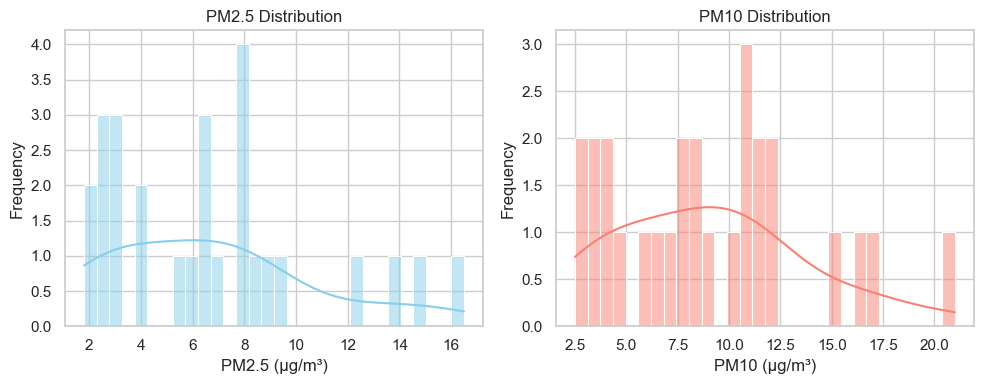

In [46]:
# Set up plot style
sns.set(style="whitegrid")

# Plot PM2.5
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df3_low['pm25'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('PM2.5 Distribution')
plt.xlabel('PM2.5 (μg/m³)')
plt.ylabel('Frequency')

# Plot PM10
plt.subplot(1, 2, 2)
sns.histplot(df3_low['pm10'].dropna(), bins=30, kde=True, color='salmon')
plt.title('PM10 Distribution')
plt.xlabel('PM10 (μg/m³)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

IAKO ZA PM10 DOBIVME DEKA IMA NORMALNA, SE GLEDA OD HISTOGRAMOT DEKA NE E TAKA, OVA MOZHE DA SE SLUCHILO ZARADI MALIOT BROJ NA PRIMEROCI, KAKO I PORADI TOA STO NEMAME DOVOLNO DOKAZI ZA DA JA PRIFATIME NORMALNATA RASPREDELBA

In [52]:
import itertools
from scipy.stats import wilcoxon

In [55]:
def check_diff(df1,df2):
    stat, p = wilcoxon(df1['pm25'], df2['pm25'], alternative='two-sided')
    print(f"Test Statistic: {stat}, p-value: {p}")
    if p < 0.05:
        print("Има статистички значајна разлика.")
    else:
        print("Немаме доволно докази да одбиеме.")
    print()  # Empty line for readability

In [56]:
check_diff(df1_low, df3_low)

Test Statistic: 14.0, p-value: 1.6391277313232422e-06
Reject the null hypothesis: The distributions are likely different.



In [57]:
check_diff(df1_none, df3_none)

Test Statistic: 99.0, p-value: 1.0719409752353979e-48
Reject the null hypothesis: The distributions are likely different.



In [58]:
check_diff(df1_high, df3_high)

Test Statistic: 3112.0, p-value: 2.714604096764408e-06
Reject the null hypothesis: The distributions are likely different.



In [59]:
check_diff(df1_none, df4_none)

Test Statistic: 145.0, p-value: 1.725610643498493e-48
Reject the null hypothesis: The distributions are likely different.



In [60]:
check_diff(df1_high, df4_high)

Test Statistic: 826.5, p-value: 1.8374237618535263e-19
Reject the null hypothesis: The distributions are likely different.



In [61]:
check_diff(df1_low, df4_low)

Test Statistic: 8.0, p-value: 3.725290298461914e-07
Reject the null hypothesis: The distributions are likely different.



In [62]:
check_diff(df2_none, df3_none)

Test Statistic: 12679.5, p-value: 1.1224813812810958e-07
Reject the null hypothesis: The distributions are likely different.



In [63]:
check_diff(df2_low, df3_low)

Test Statistic: 109.5, p-value: 0.05520309507846832
Fail to reject the null hypothesis: The distributions are likely the same.



In [64]:
check_diff(df2_high, df3_high)

Test Statistic: 618.5, p-value: 1.1429540558723147e-20
Reject the null hypothesis: The distributions are likely different.



In [65]:
check_diff(df2_none, df4_none)

Test Statistic: 7217.5, p-value: 9.265443970640247e-21
Reject the null hypothesis: The distributions are likely different.



In [66]:
check_diff(df2_low, df4_low)

Test Statistic: 174.5, p-value: 0.7317177355289459
Fail to reject the null hypothesis: The distributions are likely the same.



In [67]:
check_diff(df2_high, df4_high)

Test Statistic: 1793.0, p-value: 1.0691767360010702e-12
Reject the null hypothesis: The distributions are likely different.

